In [8]:
import pandas

file_path = "../default of credit card clients.xls"

dtypes = {
    "ID": int,
    "LIMIT_BAL": float,
    "SEX": "object",                       
    "EDUCATION": "object",                     
    "MARRIAGE": "object",                
    "AGE": int,                          
    "PAY_0": "object",                        
    "PAY_2": "object",                        
    "PAY_3": "object",                         
    "PAY_4": "object",                        
    "PAY_5": "object",                         
    "PAY_6": "object",                        
    "BILL_AMT1": float,                    
    "BILL_AMT2": float,              
    "BILL_AMT3": float,              
    "BILL_AMT4": float,              
    "BILL_AMT5": float,              
    "BILL_AMT6": float,              
    "PAY_AMT1": float,                      
    "PAY_AMT2": float,                      
    "PAY_AMT3": float,                      
    "PAY_AMT4": float,                      
    "PAY_AMT5": float,                      
    "PAY_AMT6": float,                      
    "default payment next month": int
}

df = pandas.read_excel(file_path, header = 1, dtype=dtypes)

columns = list(df.columns)
features = columns[:len(columns)-1]
label = columns[len(columns)-1:]

X = df[features]
y = df[label]

def normalize_df_columns(df: pandas.DataFrame, columns: list):
    df[columns] = (
        (df[columns] - df[columns].min())
        /
        (df[columns].max()-df[columns].min())
    )

    return df

numerical_features = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6'
]

X = normalize_df_columns(X, numerical_features)

useful_features = [
    'LIMIT_BAL',
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'AGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6'
]

X = X[useful_features]

/home/alps2/.local/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
print(y.columns)
print(y.columns)
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.125, random_state = 42)

Index(['default payment next month'], dtype='object')
Index(['default payment next month'], dtype='object')


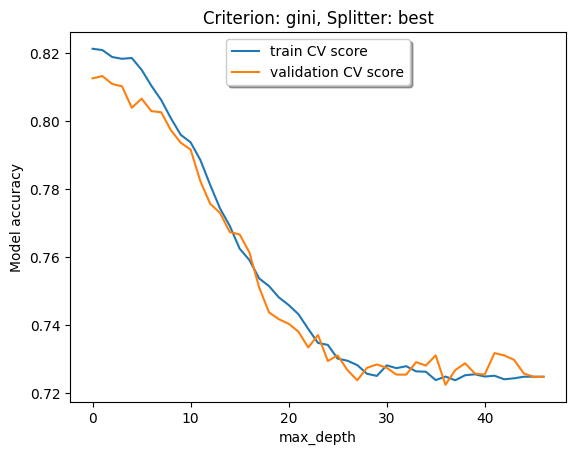

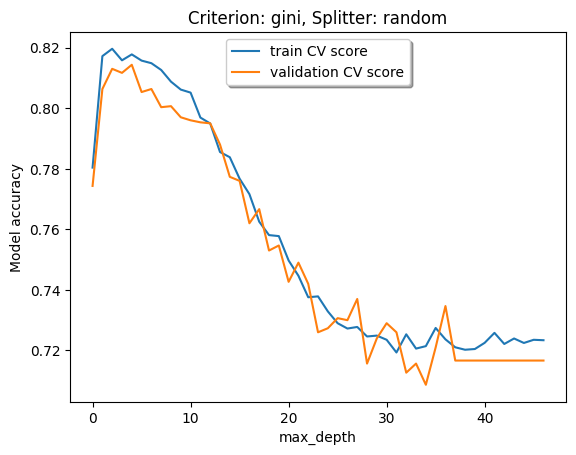

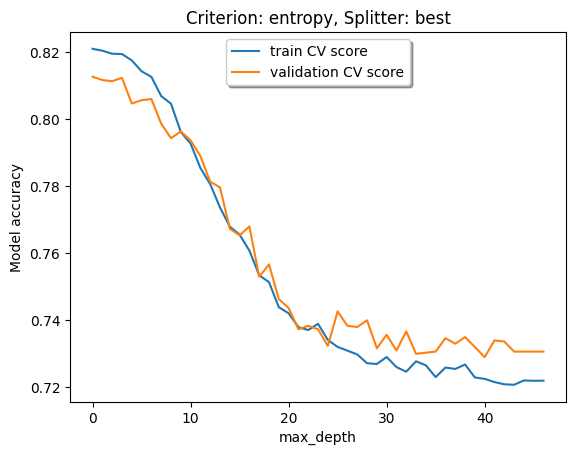

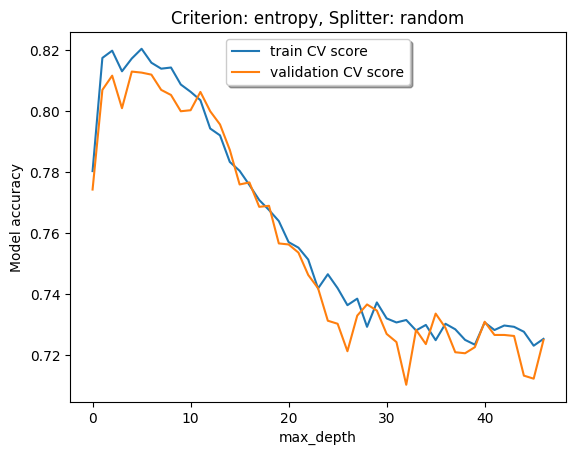

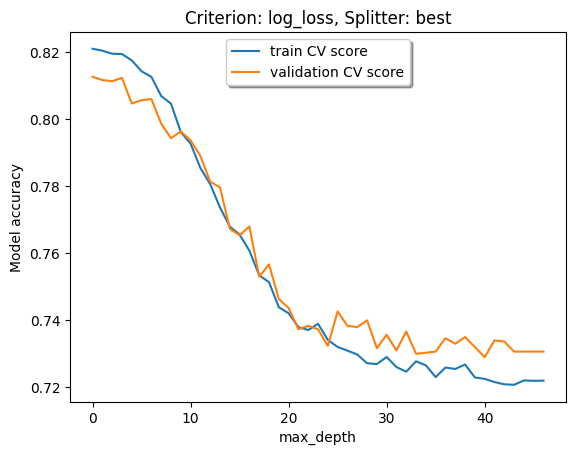

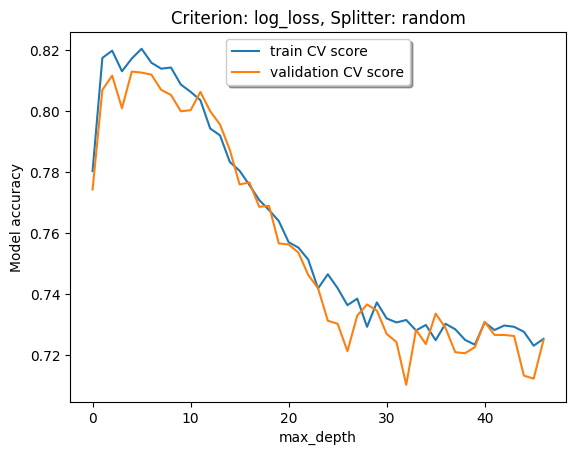

In [10]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

criterions = ["gini", "entropy", "log_loss"]
splitters = ["best", "random"]
max_depths = range(3, 50)

def train_model(criterion, splitter, max_depth):
    """ Trains models with given parameters. """
    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        random_state = 42
    )
    
    train_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    model.fit(X_train, y_train)
    validation_score = model.score(X_valid, y_valid)

    return train_score, validation_score

parameters_scores = {}

for criterion in criterions:
    for splitter in splitters:
        train_graph_data = []
        validation_graph_data = []

        for max_depth in max_depths:
            train_score, validation_score = train_model(criterion, splitter, max_depth)

            train_graph_data.append(train_score)
            validation_graph_data.append(validation_score)

            parameters_scores[validation_score] = {
                "criterion": criterion,
                "splitter": splitter,
                "max_depth": max_depth,
                "train_score": train_score,
                "validation_score": validation_score
            }

        plt.plot(train_graph_data)
        plt.plot(validation_graph_data)
        plt.legend(('train CV score', 'validation CV score'), loc='upper center', shadow=True)
        plt.title(f'Criterion: {criterion}, Splitter: {splitter}')
        plt.xlabel("max_depth")
        plt.ylabel("Model accuracy")
        plt.show()

In [11]:
from sklearn.metrics import accuracy_score

best_score = max(parameters_scores.keys())
best_parameters = parameters_scores[best_score]

print("Classificador com os melhores parâmetros encontrados:")
for key, value in best_parameters.items():
    print(f"{key}: {value}")

Classificador com os melhores parâmetros encontrados:
criterion: gini
splitter: random
max_depth: 7
train_score: 0.8177619047619047
validation_score: 0.8143333333333334
